In [1]:
import numpy as np
import matplotlib.pyplot as plt

from phystem.systems.ring.quantities.datas import DenVelData
from phystem.systems.ring.collectors.data_types import MultFileList, ArraySizeAware 
from phystem.systems.ring.quantities.calculators import DenVelCalculator

In [2]:
k = 1.2
plt.rcParams["figure.figsize"] = [k * 6.4, k * 4.8]

In [3]:
def test_num_els(array: ArraySizeAware):
    num_els = []
    for i in range(array.data.shape[0]):
        num_els.append(np.where(array.data[i,:,0] == 0)[0][0])
    
    return np.where(num_els != array.point_num_elements)[0]

def test_data(data: MultFileList):
    for fid in range(data.num_files):
        array = data.get_file(fid)
    
        if array.num_points != array.data.shape[0]:
            print(f"Erro no número de pontos: fid={fid}") 
    
        error_ids = test_num_els(array)
        if error_ids.size > 0:
            print(fid, error_ids)


In [4]:
data = DenVelData("datas/den_vel")

In [5]:
test_data(data.den_data)
print("===")
test_data(data.vel_data)

===


In [6]:
den_vel_calc = DenVelCalculator("datas/den_vel", "results/den_vel")
den_vel_calc.crunch_numbers(to_save=True)

In [7]:
vel_order_par = []

dt = 0.5
for vel in data.vel_data:
    vels = (vel[:,2:] - vel[:,:2]) / dt
    speeds = np.sqrt(np.square(vels).sum(axis=1))
    speeds[speeds == 0] = 1
    
    vel_mean = (vels/speeds.reshape(-1, 1)).sum(axis=0) / vels.shape[0]
    
    vel_order_par.append(((vel_mean**2).sum())**.5)

In [8]:
np.abs(np.array(den_vel_calc.vel_order_par) - vel_order_par).max()

3.8297200966042055e-08

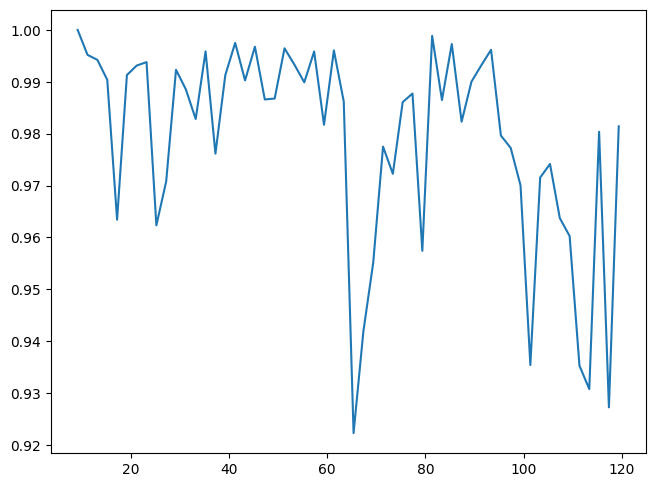

In [9]:
plt.plot(den_vel_calc.data.vel_time, den_vel_calc.vel_order_par)

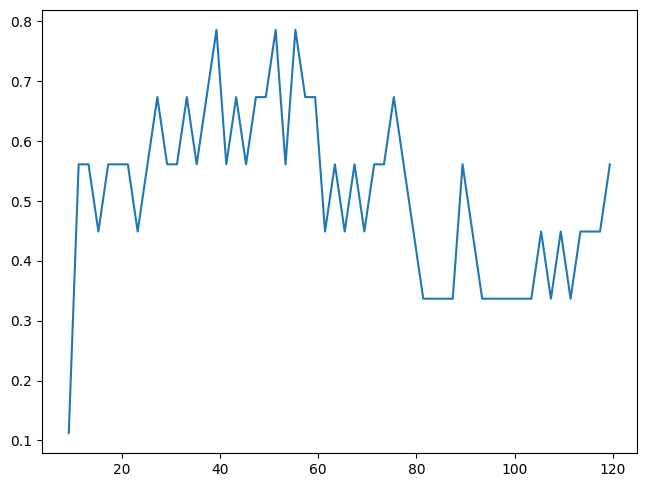

In [10]:
plt.plot(den_vel_calc.data.den_time, den_vel_calc.den_eq)